In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12.0, 8.0)

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [10]:
ricos = pd.read_csv('201910_lista_ricos.csv', encoding = 'iso-8859-1', delimiter = ';', thousands = '.')

In [11]:
ricos.head()

,rank,nombre,patrimonio,sector,empresa,comunidad
0,1,Amancio Ortega Gaona,50400,"Textil, Inmuebles","Inditex, Pontegadea Inversiones",Galicia
1,2,Rafael Del Pino y familia,7650,"Construcci¢n, Contratas, Energ¡a",Ferrovial,Madrid
2,3,Juan Roig Alfonso y familia,7050,Distribuci¢n,Mercadona,C. Valenciana
3,4,Sol Daurella Comadr n y familia,6300,"Alimentaci¢n, Bebidas","Coca Cola European Partners, Cobega",Catalu¤a
4,5,Francisco y Jon Riberas Mera,5900,"Industria, Automoci¢n","Corporaci¢n Gestamp, Gonvarri",Madrid


In [12]:
comunidades = ricos['comunidad'].unique()

In [13]:
ricos_comunidad = ricos.groupby(['comunidad'])['patrimonio'].count().sort_values(ascending=False)
ricos_comunidad

comunidad
Catalu¤a              91
Madrid                72
Galicia               30
C. Valenciana         27
Pa¡s Vasco            26
Andaluc¡a             22
Murcia                14
Asturias              14
Arag¢n                14
Castilla y Le¢n       13
Canarias              13
Baleares              12
Castilla-La Mancha    10
La Rioja               7
Cantabria              5
Extremadura            3
Navarra                2
Name: patrimonio, dtype: int64

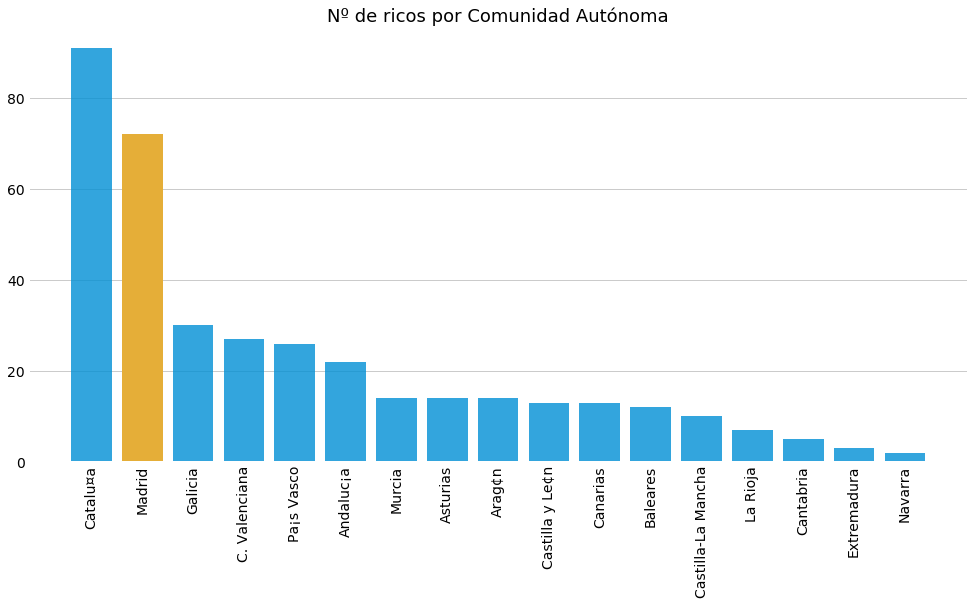

In [14]:
x = ricos_comunidad.index
y = ricos_comunidad
# Seleccionamos sólo la comunidad de Madrid
y2 = np.zeros(comunidades.size, dtype=int)
y2[1] = y[1]

plt.bar(x, y, alpha=0.8, color=sns.color_palette()[0])
plt.bar(x, y2, alpha=1, color=sns.color_palette()[2])

plt.xticks(x,rotation = 90)
plt.grid(axis='y')
plt.title('Nº de ricos por Comunidad Autónoma',fontsize= 18)
plt.savefig('images/num_ricos-comuni.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()

In [15]:
ricos_comunidad_pat = ricos.groupby(['comunidad'])['patrimonio'].sum().sort_values(ascending=False)
ricos_comunidad_pat

comunidad
Galicia               65550
Catalu¤a              55165
Madrid                52865
C. Valenciana         16625
Baleares              13120
Pa¡s Vasco             9675
Murcia                 7655
Andaluc¡a              7255
Arag¢n                 5825
Castilla y Le¢n        5380
Cantabria              5000
Asturias               4990
Canarias               3205
La Rioja               2555
Castilla-La Mancha     2050
Extremadura             715
Navarra                 280
Name: patrimonio, dtype: int64

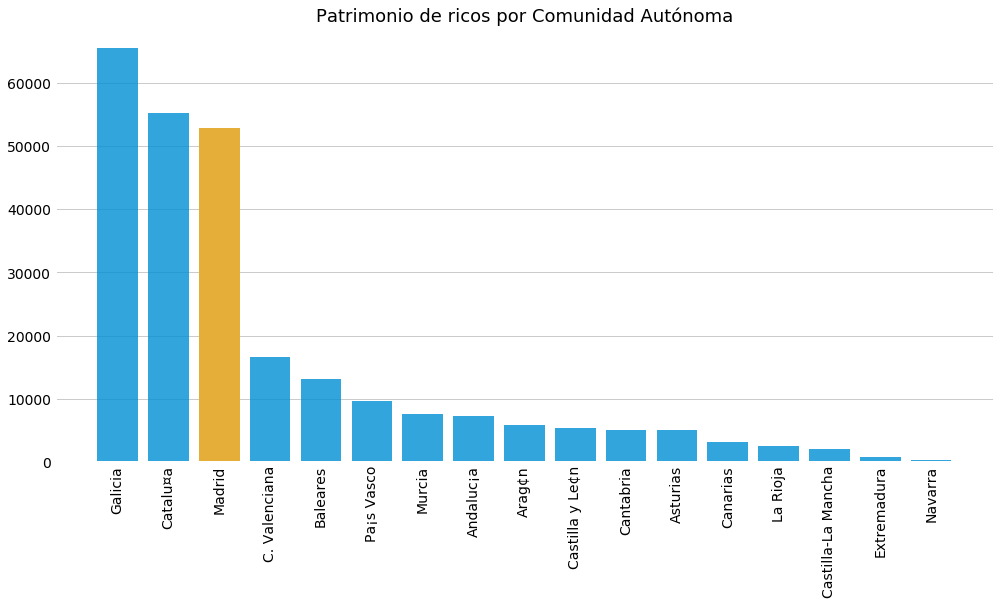

In [16]:
x = ricos_comunidad_pat.index
y = ricos_comunidad_pat
# Seleccionamos sólo la comunidad de Madrid
y2 = np.zeros(comunidades.size, dtype=int)
y2[2] = y[2]

plt.bar(x, y, alpha=0.8, color=sns.color_palette()[0])
plt.bar(x, y2, alpha=1, color=sns.color_palette()[2])

plt.grid(axis='y') 
plt.xticks(x,rotation = 90)
plt.title('Patrimonio de ricos por Comunidad Autónoma',fontsize= 18)
plt.savefig('images/pat_ricos-comuni.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()


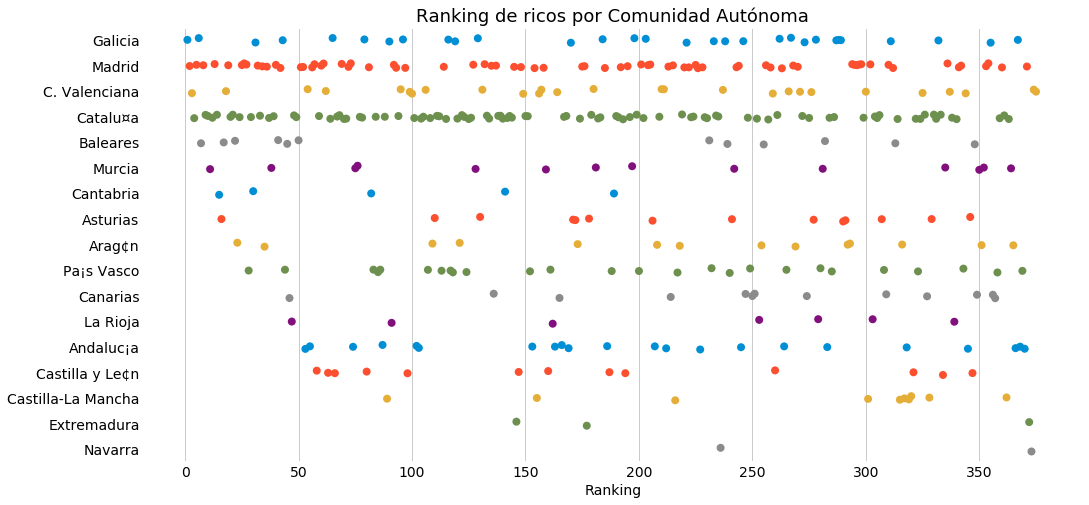

In [17]:
# Raniking de ricos por comunidades autónomas

plt.figure(figsize=(15,8))

ax = plt.subplot()
sns.stripplot(y='comunidad',x='rank', data=ricos ,size = 8, palette=sns.color_palette(),dodge = True)
#ax.set_xticklabels(comunidades, rotation = 90, va='top',fontsize= 12 )
ax.grid(axis='x') 
ax.set_ylabel('')    
ax.set_xlabel('Ranking')
ax.set_title('Ranking de ricos por Comunidad Autónoma',fontsize= 18)
plt.savefig('images/clasif_por_comuni.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()